# Ridge regression

In [1]:
# The basics
import numpy as np
import pandas as pd

# Cross validation and model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Plotting
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.pylab as pl
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
mpl.rc('font',family='Helvetica')
from plot_actual_vs_pred import plot_actual_vs_pred  # ad hoc

# Models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading data
sensor = pd.read_csv('../../data/sensor1.csv')
sensor.head(10)

,exposure,NO,NO2,NH3,0.05-1-slope-0,0.05-1-slope-1,0.05-1-slope-2,0.05-1-slope-3,0.05-1-slope-4,0.05-1-slope-5,...,2500.0-1-avg-230,2500.0-1-avg-231,5000.0-1-avg-232,5000.0-1-avg-233,5000.0-1-avg-234,5000.0-1-avg-235,5000.0-1-avg-236,5000.0-1-avg-237,5000.0-1-avg-238,5000.0-1-avg-239
0,1.0,10.0,5.0,20.0,-18.855169,-28.289268,-0.390916,-0.234549,-0.143336,0.026061,...,36.095859,36.118662,35.978584,35.880855,35.880855,35.867825,35.874340,35.825476,35.840135,35.845021
1,1.0,10.0,5.0,20.0,-28.979886,-9.251672,-0.247580,-0.169397,-0.218261,0.061895,...,36.115405,36.144723,35.978584,35.962296,35.919947,35.899858,35.910174,35.861309,35.884113,35.869996
2,1.0,10.0,5.0,20.0,-25.431240,-12.874158,-0.221519,-0.234549,0.026061,-0.312733,...,36.163183,36.141466,35.962296,35.926462,35.916689,35.910174,35.906916,35.903659,35.913432,35.900401
3,1.0,10.0,5.0,20.0,-30.126572,-8.196200,-0.260610,-0.091214,-0.130305,-0.182427,...,36.170784,36.164269,36.076313,35.978584,35.946008,35.942750,35.910174,35.933792,35.939493,35.900401
4,2.0,20.0,40.0,40.0,-19.506695,-27.051368,-0.456068,-0.403946,-0.208488,-0.256267,...,35.955781,35.929720,35.805930,35.760323,35.711458,35.688655,35.685397,35.675624,35.685397,35.665852
5,2.0,20.0,40.0,40.0,-25.357400,-13.043555,-0.469099,-0.130305,-0.221519,-0.026061,...,35.939493,35.916146,35.803487,35.704943,35.691913,35.701686,35.704943,35.701686,35.691913,35.698428
6,2.0,20.0,40.0,40.0,-27.557387,-10.983646,-0.524479,-0.065153,-0.156366,-0.117275,...,35.942750,35.884113,35.763581,35.698428,35.722046,35.695170,35.685397,35.688655,35.698428,35.675624
7,2.0,20.0,40.0,40.0,-26.569239,-12.027174,-0.338794,-0.195458,-0.130305,-0.026061,...,35.949266,35.916689,35.815703,35.734262,35.727747,35.714716,35.678882,35.708201,35.688655,35.708201
8,3.0,40.0,40.0,80.0,-20.431862,-26.334690,-0.390916,-0.351824,0.013031,-0.221519,...,35.929720,35.900401,35.789642,35.737519,35.682140,35.717974,35.714716,35.688655,35.678882,35.656079
9,3.0,40.0,40.0,80.0,-29.214435,-9.342886,-0.286672,-0.221519,-0.156366,0.026061,...,35.946008,35.974512,35.802672,35.724489,35.721231,35.698428,35.688655,35.691913,35.689469,35.688655


In [3]:
# Separating dependent and independent variables Y and X:
X = np.array(sensor.iloc[:, 4:])
Y = np.array(sensor.iloc[:, 1:4])
X, X_val, Y, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
steps = [
         ('scaler', StandardScaler()),
         ('ridge', Ridge())
        ]
n_alphas = 1000
alphas = np.logspace(-10, 4, n_alphas)

params = [{'ridge__alpha': alphas}]

pipe = Pipeline(steps)

grid_search = GridSearchCV(pipe,
                           params,
                           scoring = 'neg_root_mean_squared_error',
                           return_train_score=True
                          )

grid_search.fit(X, Y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [5]:
best_params

{'ridge__alpha': 10000.0}

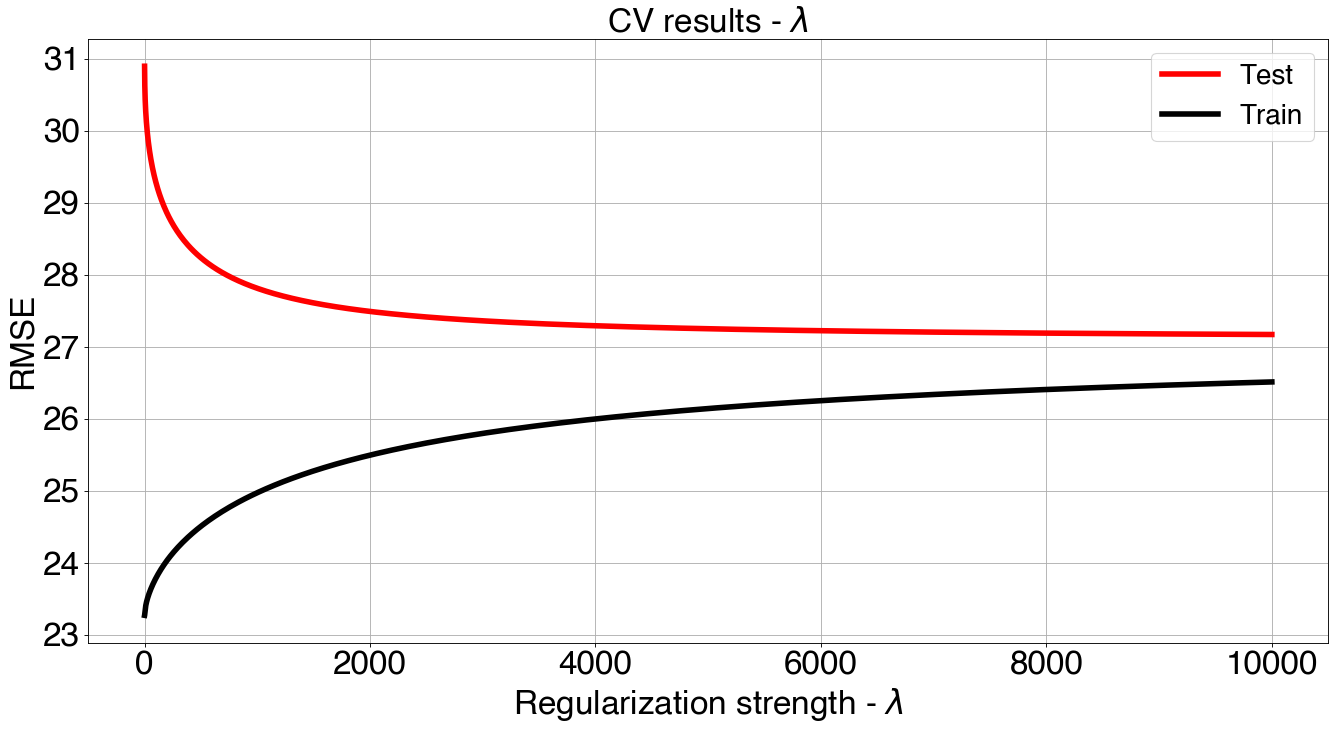

In [6]:
test_scores = -grid_search.cv_results_['mean_test_score']
train_scores = -grid_search.cv_results_['mean_train_score']

fig = plt.figure(figsize = (20,10), dpi = 80)
plt.title(r'CV results - $\lambda$', fontsize = 30)
plt.xlabel(r'Regularization strength - $\lambda$', fontsize = 30)
plt.ylabel('RMSE', fontsize = 30)
plt.plot(alphas,test_scores, label='Test', lw = 5, color = 'red')
plt.plot(alphas,train_scores, label='Train', lw = 5, color = 'black')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.legend(loc='best', fontsize = 25)
#plt.savefig('../../figures/ridge-cv-exposures.png')
plt.show()

In [7]:
best_params

{'ridge__alpha': 10000.0}

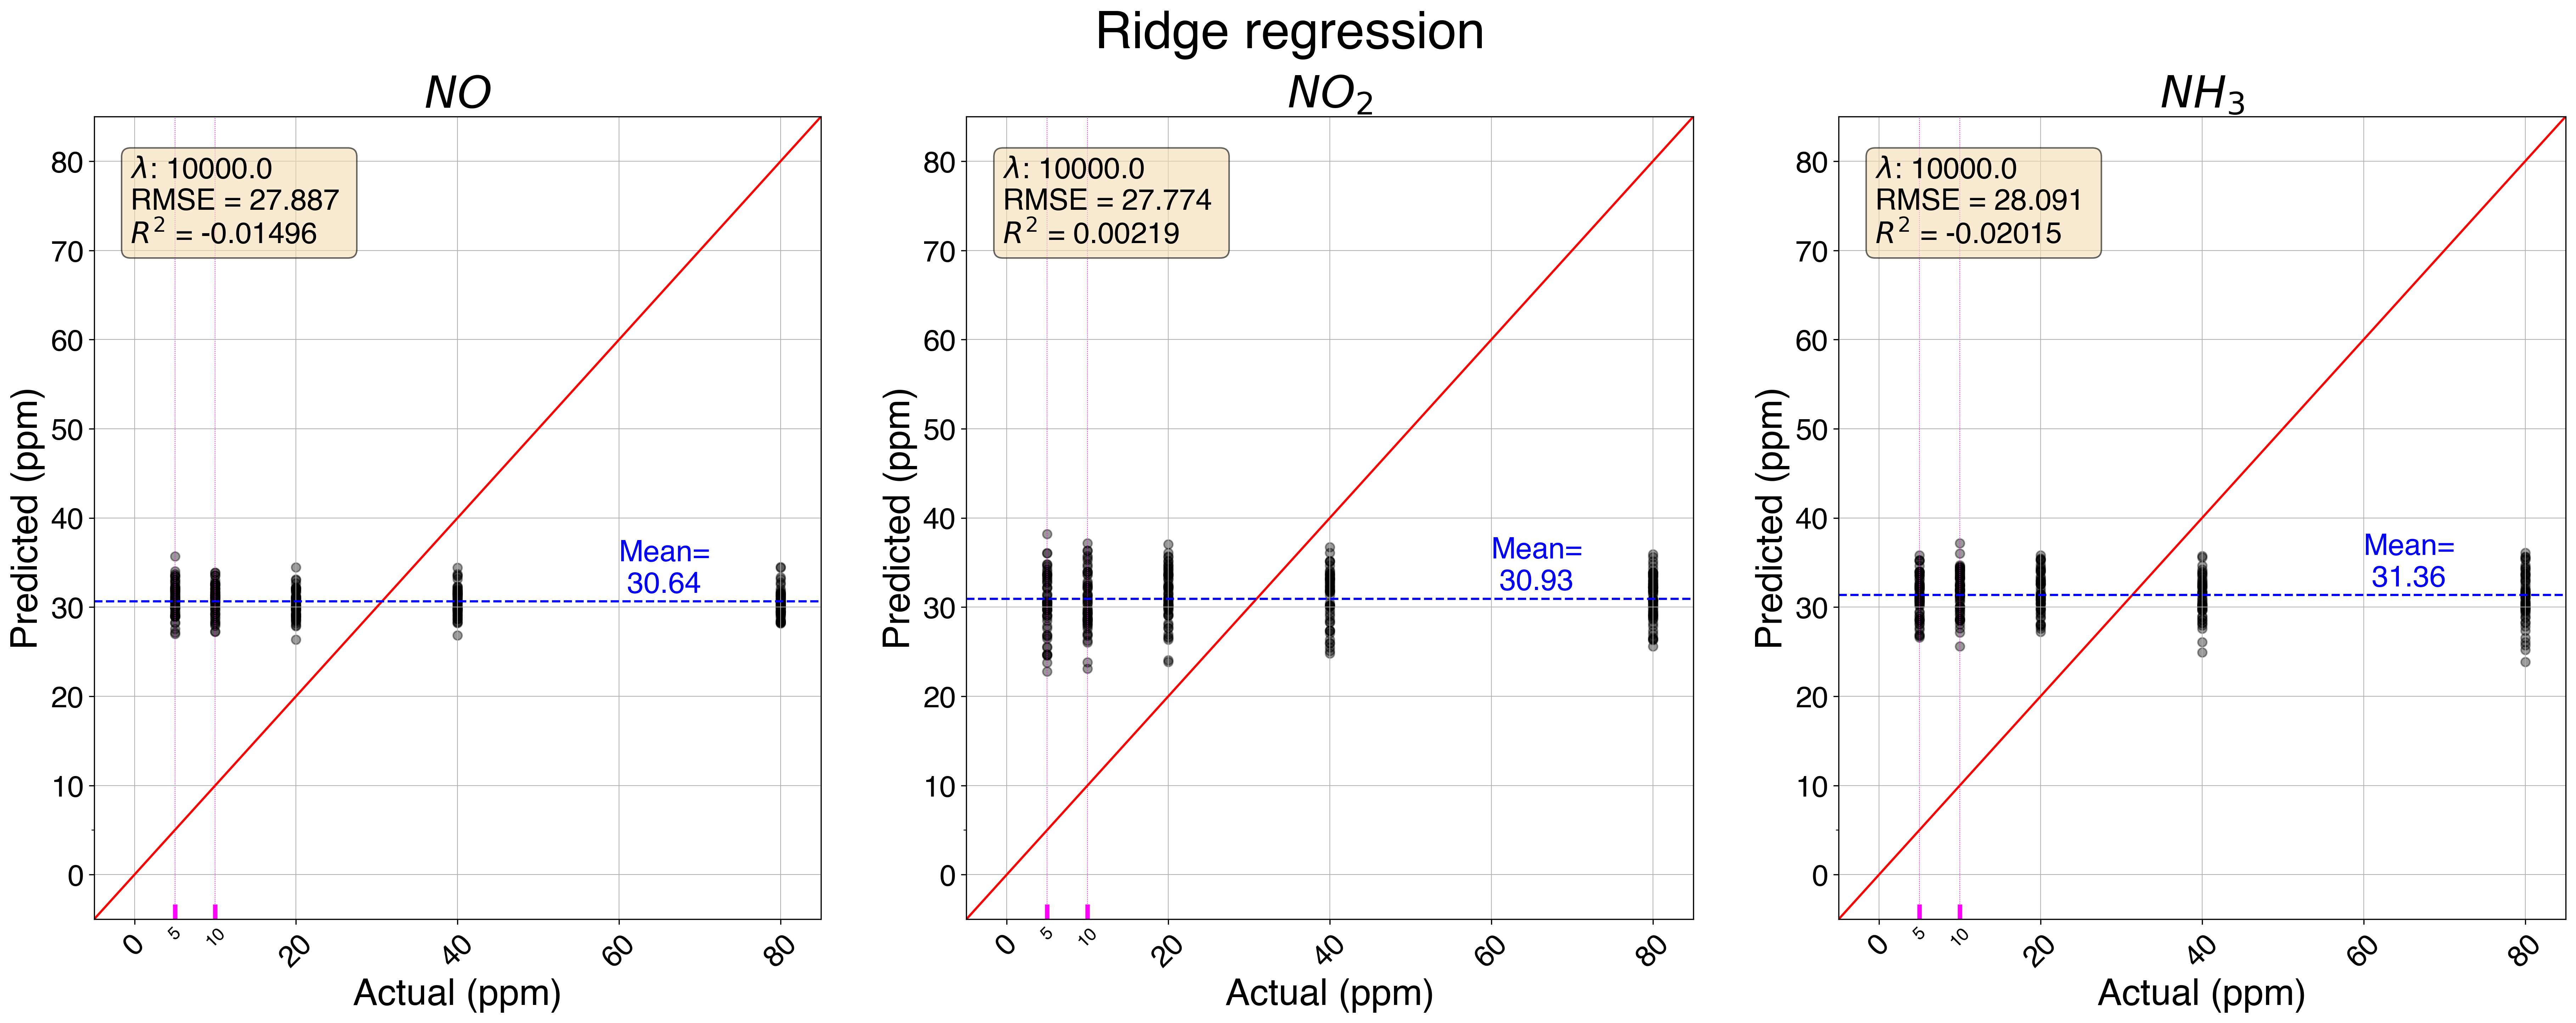

In [8]:
# Predicting on unseen validation data
Y_pred = grid_search.best_estimator_.predict(X_val)

RMSEs = np.round(mean_squared_error(Y_val, Y_pred, squared=False, multioutput = 'raw_values'), 3)
Rsquares = np.round(r2_score(Y_val, Y_pred, multioutput = 'raw_values'), 5)

info = [f"$\lambda$: {best_params['ridge__alpha']} \nRMSE = {RMSEs[i]} \n$R^2$ = {Rsquares[i]}" for i in range(3)]
plot_actual_vs_pred(Y_val, Y_pred, 'Ridge regression', info)  

In [12]:
X = np.array(sensor.iloc[:, 4:])
Y = np.array(sensor.iloc[:, 1:4])
coefs = []
scaler = StandardScaler()
X = scaler.fit_transform(X)
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_[0])

/Users/cosmo/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.05237e-16): result may not be accurate.
  overwrite_a=True).T
/Users/cosmo/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.87928e-17): result may not be accurate.
  overwrite_a=True).T
/Users/cosmo/opt/anaconda3/envs/thesis/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.09225e-16): result may not be accurate.
  overwrite_a=True).T


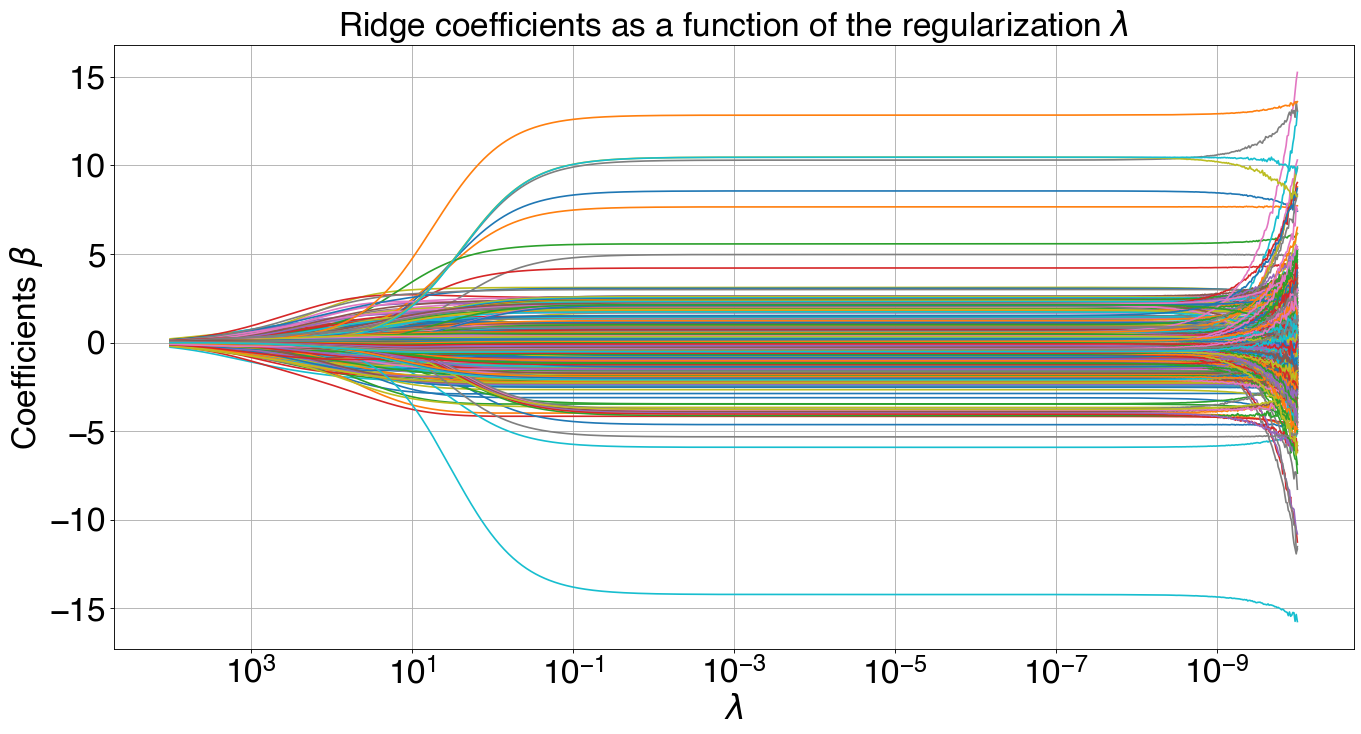

In [13]:
# # #############################################################################
# # Display results
fig = plt.figure(figsize = (20,10), dpi = 80)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$', fontsize = 30)
plt.ylabel(r'Coefficients $\beta$', fontsize = 30)
plt.title(r'Ridge coefficients as a function of the regularization $\lambda$', fontsize = 30)
plt.axis('tight')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.grid()
plt.show()